In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [ ]:
def load_data():
  data = pd.read_excel('/content/datamodelSKRIPSICOPY.xlsx')
  return data

In [ ]:
tweet_df = load_data()
df = pd.DataFrame(tweet_df[['label','bersih']])
df.head()

,label,bersih
0,negatif,wahai akun usernamenya kayak mencet keyboard k...
1,positif,trend cumi darat kek uji emisi
2,negatif,emang lu ngerasa pas bayar pajak suruh uji emi...
3,negatif,makanya dishub kabupaten kota provinsi nama uj...
4,negatif,masalah tempat kir benah oknum oknum main cinc...


In [ ]:
df['label'].value_counts()

,count
label,
negatif,1641
positif,1017
netral,794


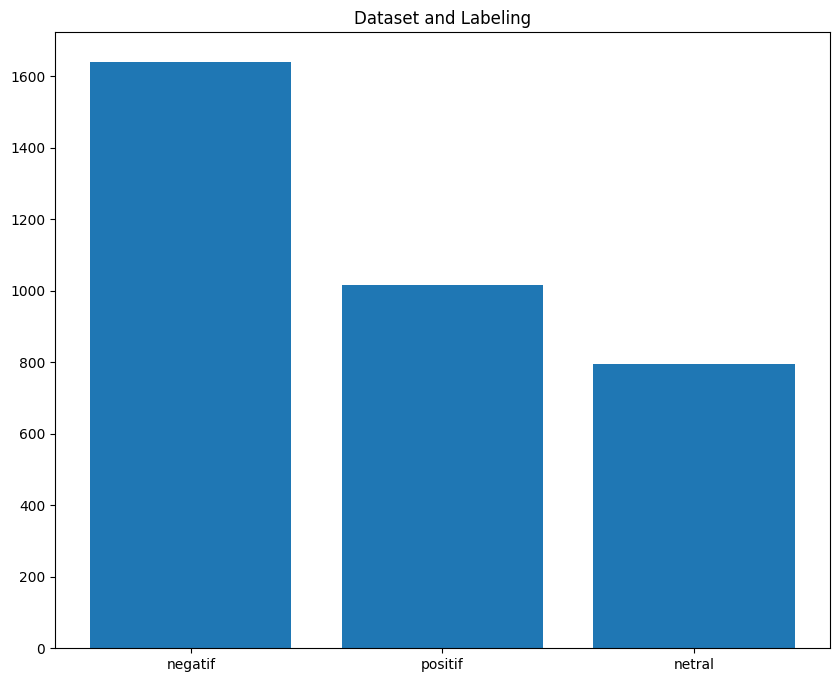

In [ ]:
# 2. Data Exploration and Visualization
label_cnt = Counter(df['label'])
plt.figure(figsize=(10,8))
plt.bar(label_cnt.keys(), label_cnt.values())
plt.title("Dataset and Labeling")
plt.show()

In [ ]:
# 3. Handling Imbalanced Data (Over-sampling)
X = df.drop(['label'], axis=1)
y = df['label']
X = df
y = df['label']
ros = RandomOverSampler(sampling_strategy="not majority")
X_res, y_res = ros.fit_resample(X, y)
df = X_res

In [ ]:
# Class distribution
y_res.value_counts()

,count
label,
negatif,1641
positif,1641
netral,1641


In [ ]:
# 4. Feature Extraction (Bag-of-Words and TF-IDF)
bow_transformer = CountVectorizer().fit(df['bersih'].values.astype('U'))
text_bow = bow_transformer.transform(df['bersih'].values.astype('U'))
X = text_bow.toarray()

In [ ]:
tfidf_transformer = TfidfTransformer().fit(text_bow)
tweet_tfidf = tfidf_transformer.transform(text_bow)
print(tfidf_transformer)
print(tweet_tfidf.shape)
print(tweet_tfidf)

TfidfTransformer()
(4923, 5741)
  (0, 5597)	0.19433394757740657
  (0, 5574)	0.2037107365490478
  (0, 5549)	0.2037107365490478
  (0, 5510)	0.2037107365490478
  (0, 5484)	0.02365329436066625
  (0, 4592)	0.11567783275768993
  (0, 3562)	0.18768100992540734
  (0, 3167)	0.14530071797109895
  (0, 3134)	0.2037107365490478
  (0, 2798)	0.1225027117750299
  (0, 2738)	0.11840168407733191
  (0, 2527)	0.2037107365490478
  (0, 2499)	0.2037107365490478
  (0, 2373)	0.12749118976320295
  (0, 2316)	0.18768100992540734
  (0, 2276)	0.271235239583013
  (0, 2217)	0.2037107365490478
  (0, 1756)	0.5830018427322197
  (0, 1418)	0.02367733137260755
  (0, 260)	0.17165128330176696
  (0, 150)	0.13222726680547361
  (0, 106)	0.17165128330176696
  (0, 37)	0.17473933123657345
  (1, 5484)	0.0714099390262046
  (1, 5375)	0.5866994734695957
  :	:
  (4919, 1418)	0.03825787471530479
  (4919, 1194)	0.15368335622386162
  (4919, 876)	0.23789288628100483
  (4919, 425)	0.20083822447663008
  (4920, 5484)	0.5308386578186177
  (4920,

In [ ]:
# 5. Model Training (LinearSVC)
x_train, x_test, y_train, y_test = train_test_split(X, df.label, test_size=0.2, random_state=0)
model = LinearSVC(max_iter=10000).fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [ ]:
# 6. Model Evaluation
y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, target_names=['negatif', 'netral', 'positif']))

Accuracy: 0.7817258883248731
              precision    recall  f1-score   support

     negatif       0.85      0.67      0.75       344
      netral       0.75      0.90      0.82       338
     positif       0.76      0.78      0.77       303

    accuracy                           0.78       985
   macro avg       0.79      0.78      0.78       985
weighted avg       0.79      0.78      0.78       985



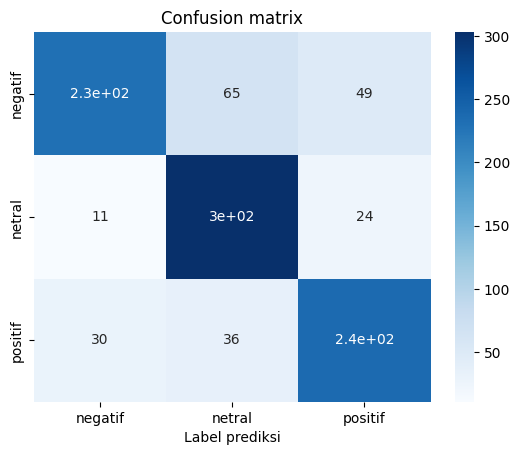

In [ ]:
# 7. Confusion Matrix
confm = confusion_matrix(y_test, y_pred)
columns = ['negatif', 'netral', 'positif']
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
sn.heatmap(df_cm, cmap='Blues', annot=True)
plt.title('Confusion matrix')
plt.xlabel('Label prediksi')
plt.show()

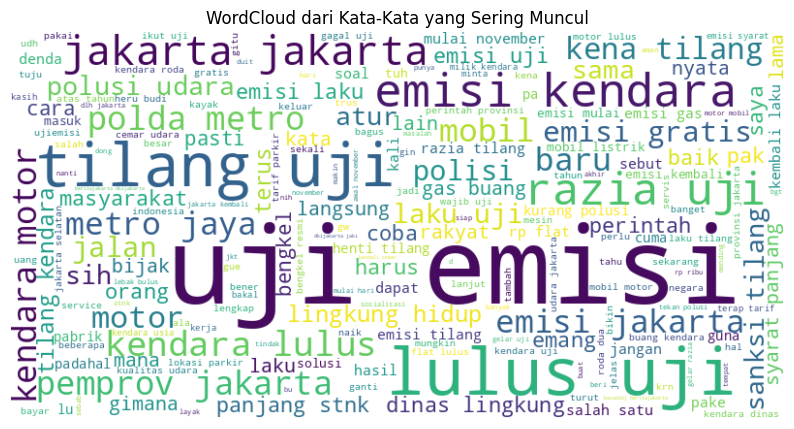

In [ ]:
#Menggunakan WordCloud untuk Visualisasi Kata (tambahan)
from wordcloud import WordCloud

# Gabungkan semua kata dalam kolom 'tweet_clean'
text = ' '.join(df['bersih'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualisasi WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kata-Kata yang Sering Muncul')
plt.show()

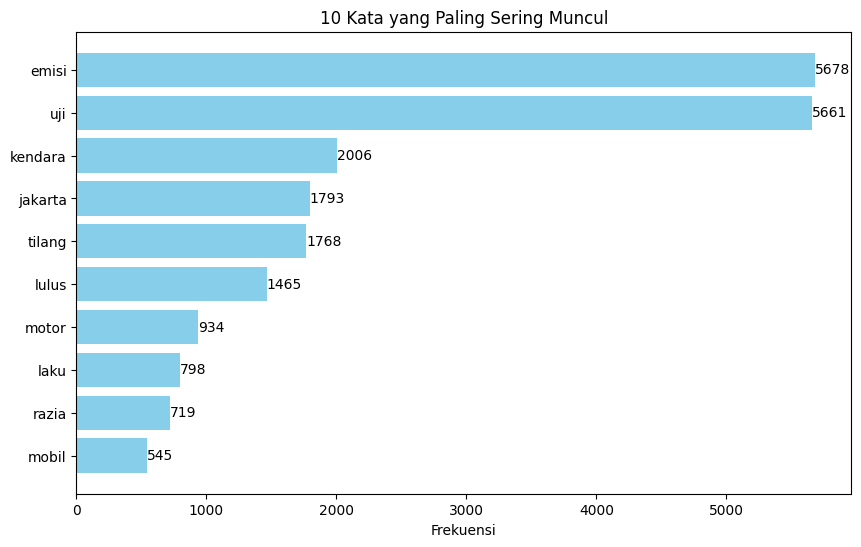

In [ ]:
#Menggunakan Matplotlib untuk Bar Chart (tambahan)
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Misalnya kolom 'tweet_clean' sudah berisi teks yang diproses
all_words = ' '.join(df['bersih']).split()
word_freq = Counter(all_words)

# Mengambil 20 kata yang paling sering muncul
most_common_words = word_freq.most_common(10)

# Memisahkan kata dan frekuensi untuk visualisasi
words, counts = zip(*most_common_words)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frekuensi')
plt.title('10 Kata yang Paling Sering Muncul')
plt.gca().invert_yaxis()  # Membalik urutan kata agar kata yang paling sering muncul di atas
for i, v in enumerate(counts):
    plt.text(v + 0.1, i, str(v), color='black', va='center', ha='left')
plt.show()

In [ ]:
# 8. Load the data from exce

test_data_path = '/content/dataujiSKRIPSICOPY.xlsx'
new_tweet_df = pd.read_excel(test_data_path)

In [ ]:
# 9. Preprocess tweets (assuming you have a function for this)
def preprocess_tweet(tweet):
    tweet = re.sub(r"\d+", "", tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#+', '', tweet)
    #remove coma
    tweet = re.sub(r',','',tweet)
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    #Aphabets only, exlude numbers and special characters
    tweet = re.sub(r'[^a-zA-Z]+', ' ', tweet)
    return tweet
new_tweet_df['processed_tweet'] = new_tweet_df['bersih'].apply(preprocess_tweet)

In [ ]:
# 10. Predict Sentiments on New Data
def predict_tweet_sentiment(tweet_text, bow_transformer, tfidf_transformer, model):
    """Predicts the sentiment label of a raw tweet text."""
    # Preprocess the tweet
    processed_tweet = preprocess_tweet(tweet_text)

    # Convert to bag of words representation
    tweet_bow = bow_transformer.transform([processed_tweet])

    # Apply TF-IDF transformation
    tweet_tfidf = tfidf_transformer.transform(tweet_bow)

    # Predict sentiment
    prediction = model.predict(tweet_tfidf)

    return prediction[0]

new_tweet_df['predicted_sentiment'] = new_tweet_df['processed_tweet'].apply(lambda x: predict_tweet_sentiment(x, bow_transformer, tfidf_transformer, model))

In [ ]:
# Display the results
print(new_tweet_df[['bersih', 'predicted_sentiment']])

                                                bersih predicted_sentiment
0                             uji emisi jangan lupa ye              netral
1     siap taxi terbang ngurus uji emisi susah ngantor             negatif
2    batas umur kendara arti mobil tua milik pakai ...             negatif
3         mobil ricky elson lulus uji emisi sama jabat              netral
4                    tilang balik truk lulus uji emisi              netral
..                                                 ...                 ...
102  hebat antek china ngibulnye ketulungan kt ngut...             negatif
103                            tanya masalah uji emisi              netral
104  lu nyadar gimmick laku yak betul uji emisi sam...              netral
105  inget kembangin mobil listrik sama mas ricky d...             negatif
106                          jaksa ken uji emisi kabar              netral

[107 rows x 2 columns]


In [ ]:
new_tweet_df.to_excel("hasilsentimenmmodel.xlsx", index=False)

In [ ]:
# 11. Comparison with Your Labels
# Assuming your Excel file has a column named 'Your_Label'
comparison_cm = confusion_matrix(new_tweet_df['label'], new_tweet_df['predicted_sentiment'], labels=['positif', 'netral', 'negatif'])
df_cm = pd.DataFrame(comparison_cm, index=['positif', 'netral', 'negatif'], columns=['positif', 'netral', 'negatif'])

In [ ]:
# Display the results
print("\nComparison Confusion Matrix:")
print(df_cm)


Comparison Confusion Matrix:
         positif  netral  negatif
positif        2       2        1
netral         1      26        9
negatif        1      12       53


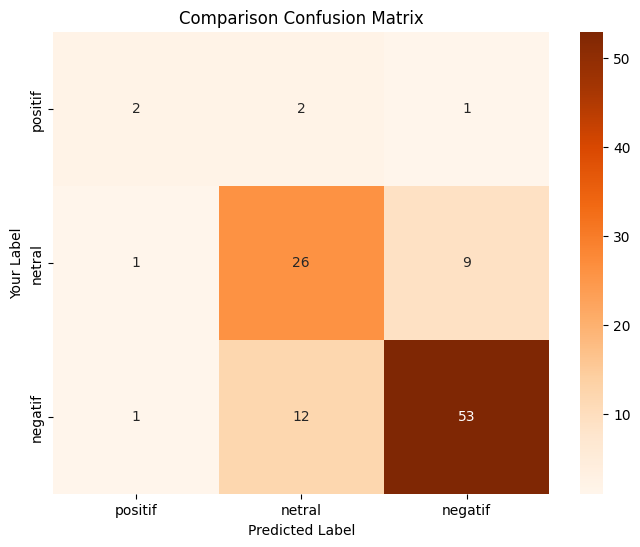

In [ ]:
plt.figure(figsize=(8, 6))
sn.heatmap(df_cm, cmap='Oranges', annot=True)
plt.title('Comparison Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Your Label')
plt.show()